In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

## Session 05: Symmetric matrices, Cholesky decomposition; vector spaces

## Gerhard Jäger

### November 5, 2024



## Symmetric matrices

- symmetric matrices are square matrices $S$ with the property that

$$
S = S^T
$$

- if there is an LDU decomposition for a symmetric matrix $S$, then

$$
\begin{aligned}
S &= LDU\\
L &= U^T
\end{aligned}
$$

- in other words, a symmetric matrix $S$ can be decomposed as
$$
S = LDL^T
$$

- if row permutation is required, it has to be accompanied by column permutation to preserve symmetry

### example



In [2]:
S = Matrix([
    [0, 1, 2],
    [1, -1, 1],
    [2, 1, 3]
])
S

Matrix([
[0,  1, 2],
[1, -1, 1],
[2,  1, 3]])

- permutation matrix

In [3]:
l, u, p = S.LUdecomposition()

In [4]:
l

Matrix([
[1, 0, 0],
[0, 1, 0],
[2, 3, 1]])

In [5]:
u

Matrix([
[1, -1,  1],
[0,  1,  2],
[0,  0, -5]])

In [6]:
p

[[0, 1]]

In [7]:
P = Matrix([
    [0,1,0],
    [1,0,0],
    [0,0,1]
])
P

Matrix([
[0, 1, 0],
[1, 0, 0],
[0, 0, 1]])

In [8]:
S1 = P*S*P.inv()
S1

Matrix([
[-1, 1, 1],
[ 1, 0, 2],
[ 1, 2, 3]])

$$
\begin{aligned}
    L &= \left[\begin{matrix}
        1 & 0 & 0\\
        -1 & 1 & 0\\
        -1 & 3 & 1
    \end{matrix}\right]\\[1em]
    D &= \begin{bmatrix}
    -1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & -5
    \end{bmatrix}\\
    PSP^T &= L D L^T
\end{aligned}
$$


### Cholesky decomposition

Let us consider the so-called **quadratic form** of $S$:

$$
\mathbf x' S \mathbf x
$$

This function assigns each vector $\mathbf x$ to some real number – something like a high-dimensional parabola.

Example:

In [9]:
S = Matrix([
    [3, 1],
    [1, -1]
])
S

Matrix([
[3,  1],
[1, -1]])

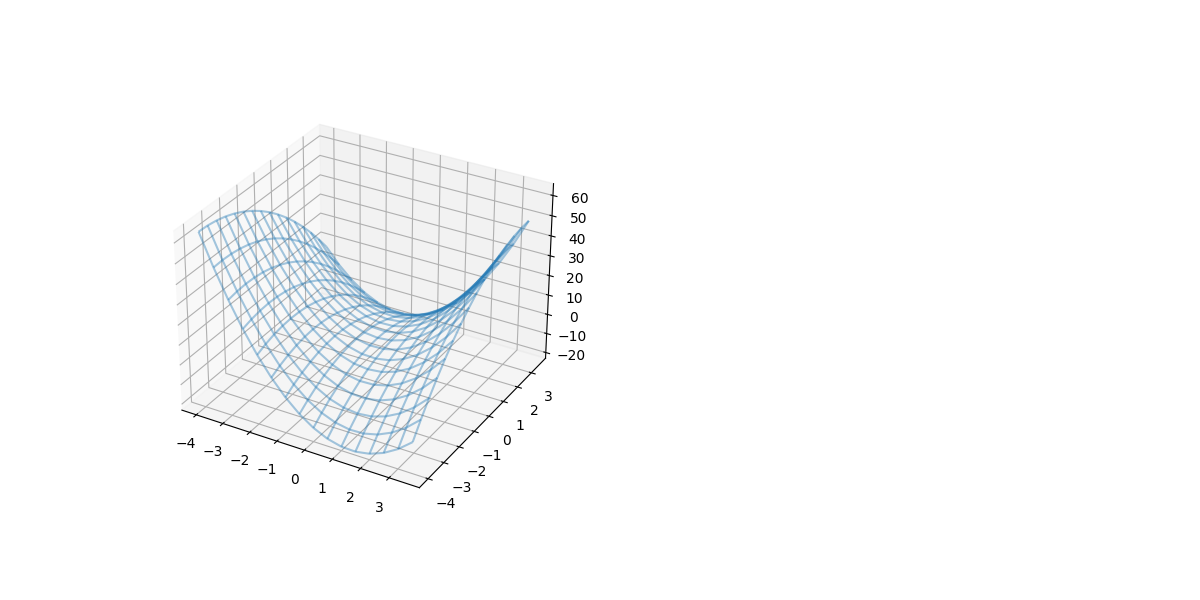

In [10]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')

x = np.arange(-4, 4, .5)
y = np.arange(-4, 4, .5)
X,Y = np.meshgrid(x,y)


def sQuadratic(v, S=S):
    return (S @ v) @ v

Z = np.apply_along_axis(sQuadratic, 0, np.array([X, Y]))

ax.plot_wireframe(X, Y, Z, alpha=0.4)
plt.show()


### Positive definite matrices

The quadratic form of $S$ has a saddle point at $\mathbf 0$.

Symmetric matrices with a quadratic form which is everywhere $\neq \mathbf 0$ positive are called **positive definit**.

#### Definition
A matrix $S$ is **positive definite** if and only if for all vectors $\mathbf x \neq \mathbf 0$:
$$
    \mathbf x' S \mathbf x > 0
$$


#### Example

In [11]:
S1 = Matrix([
    [2,-1],
    [-1,2]
])
S1

Matrix([
[ 2, -1],
[-1,  2]])

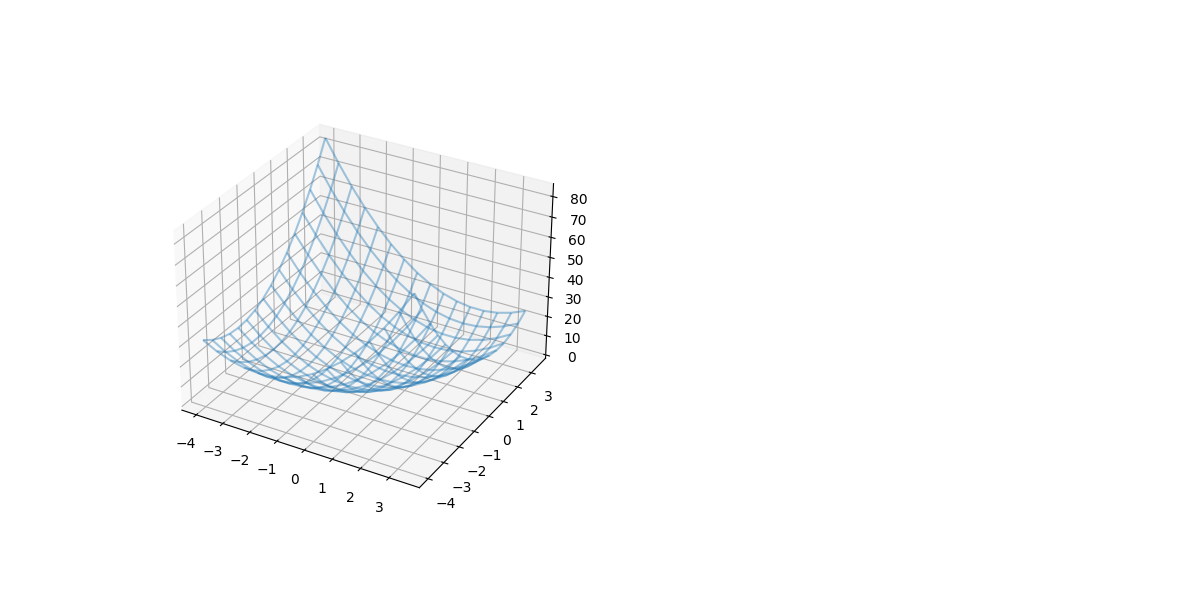

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')


Z = np.apply_along_axis(lambda v:sQuadratic(v, S1), 0, np.array([X, Y]))

ax.plot_wireframe(X, Y, Z, alpha=0.4)
plt.show()


Suppose we know that

$$
\begin{aligned}
\mathbf x^TS\mathbf x &> 0 & \forall \mathbf x:\mathbf x\neq \mathbf 0\\
S &= LDL^T
\end{aligned}
$$

This entails

$$
\begin{aligned}
\mathbf x^TS\mathbf x &> 0\\
\mathbf x^TLDL^T\mathbf x &> 0
\end{aligned}
$$

Let us introduce a variable $\mathbf y$

$$
\begin{aligned}
\mathbf y &= L^T\mathbf x\\
\mathbf x &= (L^T)^{-1}\mathbf y &(L\text{ must be invertible, which follows from definiteness.})\\
\mathbf y^T D\mathbf y &> 0\\
\sum_i d_i y_i^2 &> 0
\end{aligned}
$$

For each $i$, we can set $y_i=1$, $\forall j\neq i: y_j = 0$. It follows that
$$
\forall i: d_i > 0
$$

So if $S$ is positive definite and the LU-decomposition gives $S = LDL^T$, all entries of $D$ must be positive.

We define

$$
(D^{\frac{1}{2}})_{ij} = \sqrt{d_{ij}}
$$

It follows that

$$
D = D^{\frac{1}{2}} D^{\frac{1}{2}}
$$

Taken together, we have

$$
S = LD^{\frac{1}{2}} D^{\frac{1}{2}}L^T
$$

It follows that for each positive definite matrix $S$ wich has an LU decomposition, there is a lower triangular matrix $M$ such that

$$
S = M M^T
$$

This factorization is called **Cholesky decomposition**.

In [13]:
S = Matrix([
    [2,-1,0],
    [-1,2,-1],
    [0,-1,2]
])
S

Matrix([
[ 2, -1,  0],
[-1,  2, -1],
[ 0, -1,  2]])

In [14]:
S.is_positive_definite

True

In [15]:
M = S.cholesky()
M

Matrix([
[   sqrt(2),          0,           0],
[-sqrt(2)/2,  sqrt(6)/2,           0],
[         0, -sqrt(6)/3, 2*sqrt(3)/3]])

In [16]:
M*M.T

Matrix([
[ 2, -1,  0],
[-1,  2, -1],
[ 0, -1,  2]])

In [17]:
S = Matrix([
    [3, 1],
    [1, -1]
])
S

Matrix([
[3,  1],
[1, -1]])

In [18]:
S.is_positive_definite

False

In [19]:
try:
    S.cholesky()
except:
    print("Matrix is not positive definite")

Matrix is not positive definite


### Fact

If a square matrix (not necessarily symmetric) is invertible, the following two matrices are positive semi-definite:

$$
A A^T\\
A^T A
$$

## Vector spaces

In mathematics, vector spaces are not confined to $\mathbb R^n$. Any set can be a vector space if the following eight axioms are met.

<table border="0" style="width:100%;" align = "left">
<tbody><tr>
<th>Axiom</th>
<th>Meaning
</th>
    <tr>
    <td>Associativity of vector addition</td>
    <td><span class="texhtml"><b>u</b> + (<b>v</b> + <b>w</b>) = (<b>u</b> + <b>v</b>) + <b>w</b></span>
    </td></tr>
    
<tr style="background:#F8F4FF;">
<td>Commutativity of vector addition</td>
<td><span class="texhtml"><b>u</b> + <b>v</b> = <b>v</b> + <b>u</b></span>
</td></tr>
<tr>
<td>Identity element of vector addition</td>
<td>There exists an element <span class="texhtml"><b>0</b> ∈ <i>V</i></span>, called the <i>zero vector</i>, such that <span class="texhtml"><b>v</b> + <b>0</b> = <b>v</b></span> for all <span class="texhtml"><b>v</b> ∈ <i>V</i></span>.
</td></tr>
<tr style="background:#F8F4FF;">
<td>Inverse elements of vector addition</td>
<td>For every <span class="texhtml"><b>v</b> ∈ <i>V</i></span>, there exists an element <span class="texhtml">−<b>v</b> ∈ <i>V</i></span>, called the <i>additive inverse</i> of <span class="texhtml"><b>v</b></span>, such that <span class="texhtml"><b>v</b> + (−<b>v</b>) = <b>0</b></span>.
</td></tr>
<tr>
<td>Compatibility of scalar multiplication with field multiplication</td>
<td><span class="texhtml"><i>a</i>(<i>b</i><b>v</b>) = (<i>ab</i>)<b>v</b></span> <sup id="cite_ref-4" class="reference"><a href="#cite_note-4">&#91;nb 3&#93;</a></sup>
</td></tr>
<tr style="background:#F8F4FF;">
<td>Identity element of scalar multiplication</td>
<td><span class="texhtml">1<b>v</b> = <b>v</b></span>, where <span class="texhtml">1</span> denotes the multiplicative identity in <span class="texhtml mvar" style="font-style:italic;">$\mathbb R$</span>.
</td></tr>
<tr>
<td>Distributivityof scalar multiplication with respect to vector addition</td>
<td><span class="texhtml"><i>a</i>(<b>u</b> + <b>v</b>) = <i>a</i><b>u</b> + <i>a</i><b>v</b></span>
</td></tr>
<tr style="background:#F8F4FF;">
<td>Distributivity of scalar multiplication with respect to field addition</td>
<td><span class="texhtml">(<i>a</i> + <i>b</i>)<b>v</b> = <i>a</i><b>v</b> + <i>b</i><b>v</b></span>
</td></tr></tbody></table>

A subset $\alpha$ of a vector space is a **sub-space** if it is also a vector space.

This is guaranteed if two conditions are met: If $\mathbf u, \mathbf v\in \alpha$, 

- $\mathbf u + \mathbf v \in \alpha$
- for any scalar $c$, $c\mathbf u\in \alpha$.

### Column space of a matrix

For an $n\times m$ matrix $A$, the set $\{A\mathbf x:\mathbf x\in \mathbb R^m\}$ is a subspace of $\mathbb R^n$, because:


- $A\mathbf u + A\mathbf v = A(\mathbf u+\mathbf v)$
- $Ac\mathbf u = cA\mathbf u$

This vector space is called the **column space** of $A$, because it consists of all linear combinations of the column vectors of $A$.


The system of linear equation 
$$
A\mathbf x = \mathbf b
$$

is solvable if and only if $\mathbf b$ is in the column space of $A$.

So far we have focused on invertable matrices. In this case, the column space equals the entire vector space.

But what about non-invertable matrices?

We proceed per Gauss-Jordan elimination as usual. After the Gauss part, we will see whether the system is solvable.

$$
\begin{aligned}
\begin{bmatrix}
1 & 0\\
4 & 3\\
2 & 3
\end{bmatrix} \mathbf x &=
\begin{bmatrix}
1\\1\\0
\end{bmatrix}
\end{aligned}
$$

$$
\left[
\begin{array}{rr|r}
1 & 0 & 1\\
4 & 3 & 1\\
2 & 3 & 0
\end{array}
\right]\\[1em]
\left[
\begin{array}{rr|r}
1 & 0 & 1\\
0 & 3 & -3\\
0 & 3 & -2
\end{array}
\right]\\[1em]
\left[
\begin{array}{rr|r}
1 & 0 & 1\\
0 & 3 & -3\\
0 & 0 & 1
\end{array}
\right]\\[1em]
$$

There can't be a solution for the last row, so $\mathbf b$ is not in the column space of $A$.

Another example:

$$
\begin{aligned}
A & =
\begin{bmatrix}
1 & 2& 3\\
2 & 4 & 3\\
3 & 6 & 1
\end{bmatrix}\\[1em]
\mathbf b &= \begin{bmatrix} 4\\ 5\\ 4\end{bmatrix}\\[1em]
A\mathbf x &= \mathbf b
\end{aligned}
$$

$$
\displaystyle
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
2 & 4 & 3 & 5\\
3 & 6 & 1 & 4
\end{array}
\right]\
$$


$$
\displaystyle
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
3 & 6 & 1 & 4
\end{array}
\right]\\[1em]
$$


$$
\displaystyle
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & -8 & -8
\end{array}
\right]\\[1em]
$$


$$
\displaystyle
\left[
\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}
\right]
$$


$$
\displaystyle
\left[
\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}
\right]
$$


$$
\displaystyle
\left[
\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 0
\end{array}
\right]\\[1em]
$$


Since the left side is not the identity matrix, we cannot simply read off the solution from the right side.



### Pivots

A pivot cell in a matrix $A$ is a cell $a_{ij}$ with an entry $\neq 0$ such that
$$
\begin{aligned}
a_{ij} &\neq 0\\
\forall k\geq i, l< j: &  a_{kl} = 0
\end{aligned}
$$

During Gauss elimination, we

- go top-down through the rows,
- identify the pivot in the current row, and
- transform all cells below the pivot into $0$ using elimination.

A column with a pivot in it is called *pivot column*.

A column without a pivot in it is called *free column*.

After Gauss-Jordan elimination, we find the *canonical solution* by
- setting all positions corresponding to a free column to $0$, and
- setting all positions corresponding to a pivot column to the entry on the the same row as the pivot on the right side.

For our example above, the solution thus found is
$$
\begin{bmatrix}
1 \\ 0 \\ 1
\end{bmatrix}
$$

### Example

$$
\left[
\begin{array}{cccc|c}
1 & 3 & 0 & 2 & 1\\
0 & 0 & 1 & 4 & 6\\
1 & 3 & 1 & 6 & 7
\end{array}
\right]\\[2em]
\left[
\begin{array}{cccc|c}
1 & 3 & 0 & 2 & 1\\
0 & 0 & 1 & 4 & 6\\
0 & 0 & 1 & 4 & 6
\end{array}
\right]\\[2em]
\left[
\begin{array}{cccc|c}
1 & 3 & 0 & 2 & 1\\
0 & 0 & 1 & 4 & 6\\
0 & 0 & 0 & 0 & 0
\end{array}
\right]
$$

canonical solution:
$$
\begin{bmatrix}
1\\0\\6\\0
\end{bmatrix}
$$

## The nullspace of a matrix

The canonical solution is only one of infinitely many solutions.

$$
\begin{aligned}
A & =
\begin{bmatrix}
1 & 2& 3\\
2 & 4 & 3\\
3 & 6 & 1
\end{bmatrix}\\[1em]
\mathbf b &= \begin{bmatrix} 4\\ 5\\ 4\end{bmatrix}\\[1em]
A\mathbf x &= \mathbf b\\
\mathbf x &= \begin{bmatrix}
1 \\ 0 \\ 1
\end{bmatrix}, 
\begin{bmatrix}
-1 \\ 1 \\ 1
\end{bmatrix},
\begin{bmatrix}
3 \\ -1 \\ 1
\end{bmatrix},\cdots
\end{aligned}
$$

How do we find all solutions?

Suppose we have a solution $\mathbf y$ to 

$$
A\mathbf y = \mathbf 0
$$

Let $\mathbf x$ be the canonical solution to

$$
A\mathbf x = \mathbf b
$$

It follows:

$$
\begin{aligned}
A\mathbf x + A\mathbf y &= \mathbf b + \mathbf 0\\
A(\mathbf x + \mathbf y) &= \mathbf b
\end{aligned}
$$

The set of solutions $\mathbf y$ to $A\mathbf y = \mathbf 0$ form a *vector space*:




Suppose $A\mathbf y_1 = \mathbf 0$ and $A\mathbf y_2 = \mathbf 0$.

$$
\begin{aligned}
A(\mathbf y_1 + \mathbf y_2) &= A\mathbf y_1 + A\mathbf y_2\\
&= \mathbf 0 + \mathbf 0\\
&= \mathbf 0\\[2em]
A(c\mathbf y_1) &= cA\mathbf y_1\\
&= c~\mathbf 0\\
&=\mathbf 0
\end{aligned}
$$

The set of solutions $\mathbf y$ to $A\mathbf y = \mathbf 0$ is called the **nullspace** of $A$.

### How to find the null space

**important observation:** applying an elimination step to a matrix does not change the null space!

If
$$
A\mathbf x = \mathbf 0,
$$

then
$$
EA\mathbf x = E\mathbf 0 = \mathbf 0
$$

---

For the reverse direction, note that elimination matrices are always invertible by construction.

If
$$
EA\mathbf x = \mathbf 0
$$

then

$$
A\mathbf x = E^{-1}\mathbf 0 = \mathbf 0
$$



So we can apply Gauss-Jordan elimination first and then find the null space of the **reduced row echelon form**.

For each free column $i$ in the reduced row echelon form or $A$:
- set $y_i = 1$,
- set $y_j = 0$ for all free columns $j\neq i$,
- solve $A\mathbf y = \mathbf 0$ via substitution.




<img src="_img/nullspaceStrang.svg"  width="1500" style="display: block; margin-left: auto; margin-right: auto;">

(Strang, p. 135)

###  simple example

$$
A = \begin{bmatrix}
1&2\\
3&6
\end{bmatrix}
$$

Elimination stops after one step:

$$
\begin{bmatrix}
1&2\\
0&0
\end{bmatrix}
$$

- the entry in the upper left corner is the only pivot
- the second column is free
- the special solution is the solution of

$$
\begin{bmatrix}
1&2\\
0&0
\end{bmatrix}\begin{bmatrix}x_1\\1\end{bmatrix} = \mathbf 0
$$

- the only special solution is $\mathbf x = \left[\begin{array}{r}-2\\1\end{array}\right]$
- the null space of $A$ is the set of multiples of $\mathbf x$

The result of Gauss elimination is called **row echelon form**.

The result of Gauss-Jordan elimination is called **reduced row echelon form**.

*Sympy* has a function that returns
- the reduced row echelon form of a matrix
- the tuple of indices of the pivot columns

In [20]:
A = Matrix([
    [1,2],
    [3,6]
])
rr,i = A.rref()
rr

Matrix([
[1, 2],
[0, 0]])

In [21]:
i

(0,)

back to our previous examples

In [22]:
A = Matrix([
    [1,2,3],
    [2,4,3],
    [3,6,1]
])
A

Matrix([
[1, 2, 3],
[2, 4, 3],
[3, 6, 1]])

In [23]:
rr,i = A.rref()
rr

Matrix([
[1, 2, 0],
[0, 0, 1],
[0, 0, 0]])

In [24]:
i

(0, 2)